# Can we predict monthly spending early?

The question we'd like to know is how early in the month do we know that something bad is happening?

Or how soon in each month can we reward the user for saving well?

In [11]:
import dbconnect
import pandas
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
data1=dbconnect.get_data()

In [14]:
data1['year_month'] = data1.date.dt.strftime("%Y-%m")
data1['day_of_month'] = data1.date.dt.day

In [16]:
data=data1[data1.user_id=='auth0|5a79f5c4ed65e34236bd7800']

The imaginatively-named "df" is a dataframe with two indexes on the columns:
- category
- month

Each row is a day of the month.

The cell is the cumulative sum of spending in that category in that month.

e.g. `df.loc[15, ("Food & Drink", "2017-10")]`  is the total amount spent between 2017-10-1 and 2017-10-15 


Bank Fees                                                                  \
     2016-02 2016-03 2016-04 2016-05 2016-06 2016-07 2016-08 2016-09 2016-10   
1        0.0     0.0     0.0     0.0     0.0     0.0    0.00    0.00     0.0   
2        0.0     0.0     0.0     0.0     0.0     0.0  303.34    0.00     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0  408.04    0.00     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
5        0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
6        0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
7        0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
8        0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
9        0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
10       0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
11       0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
12       0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
13       0.0     0.0     0.0     0.0     0.0     0.0  396.04    0.00     0.0   
14       0.0     0.0     0.0     0.0     0.0     0.0  396.04   72.74     0.0   
15       0.0     0.0     0.0     0.0     0.0     0.0  396.04   60.74     0.0   
16       0.0     0.0     0.0     0.0     0.0     0.0  396.04   60.74     0.0   
17       0.0     0.0     0.0     0.0     0.0     0.0  396.04   60.74     0.0   
18       0.0     0.0     0.0     0.0     0.0     0.0  554.24   60.74     0.0   
19       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
20       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
21       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
22       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
23       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
24       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
25       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
26       0.0     0.0     0.0     0.0     0.0     0.0  542.24   60.74     0.0   
27       0.0     0.0     0.0     0.0     0.0     0.0  542.24   81.72     0.0   
28       0.0     0.0     0.0     0.0     0.0     0.0  542.24   69.72     0.0   
29       0.0     0.0     0.0     0.0     0.0     0.0  542.24   69.72     0.0   
30       0.0     0.0     0.0     0.0     0.0     0.0  542.24   69.72     0.0   
31       0.0     0.0     0.0     0.0     0.0     0.0  542.24   69.72     0.0   

             ...    Travel                                                  \
   2016-11   ...   2017-05 2017-06 2017-07 2017-08 2017-09 2017-10 2017-11   
1      0.0   ...      0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2      0.0   ...      0.00    0.00    0.00    0.00    0.00    0.00    0.00   
3      0.0   ...    -36.01    0.00    0.00    0.00    0.00    0.00    0.00   
4      0.0   ...    -36.01    0.00    0.00   -2.71    0.00    0.00    0.00   
5      0.0   ...    -42.90    0.00    0.00   -2.71    0.00    0.00    0.00   
6      0.0   ...    -42.90  -46.69  -31.66   -2.71  -43.23  -40.21    0.00   
7      0.0   ...    -42.90  -46.69  -31.66  -24.58  -43.23  -40.21    0.00   
8      0.0   ...    -42.90  -46.69  -31.66  -24.58  -43.23  -40.21  -45.31   
9      0.0   ...    -42.90  -46.69  -31.66  -24.58  -43.23  -40.21  -45.31   
10     0.0   ...    -59.79  -46.69  -31.66  -24.58  -43.23  -40.21  -45.31   
11     0.0   ...    -82.33  -46.69  -47.54  -68.24  -43.23  -49.27  -45.31   
12     0.0   ...   -129.12  -46.69  -47.54  -68.24  -43.23  -49.27  -45.31   
13     0.0   ...   -129.12  -46.69  -47.54  -68.24  -43.23  -49.27  -45.31   
14     0.0   ...   -129.12  -81.98  -47.54  -68.24  -68.87  -49.27  -45.31   
15     0.0   ...   -129.12  -81.98  -47.54  -68.24  -68.87  -49.27  -45.31   
16     0.0   ...   -140.47  -81.98  

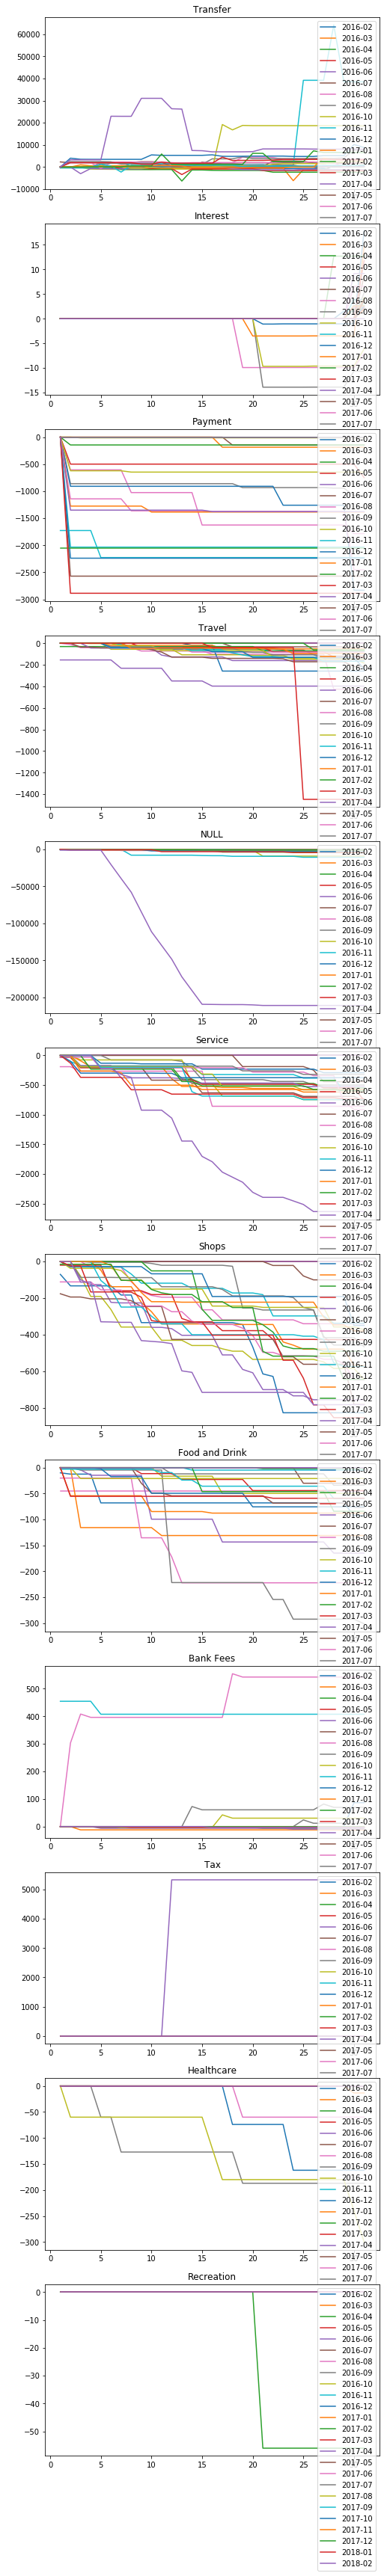

In [17]:
month_by_month_by_category = {}
for category in data.category.unique():
    for month in data.year_month.unique():
        month_by_month_by_category[category, month] = data[(data.year_month == month) & 
                                                                   (data['category'] == category)].copy()
month_by_month_by_category.keys()

pre_df = {}
for (category,month) in month_by_month_by_category.keys():
    rolling_sums = []
    month_df = month_by_month_by_category[(category,month)]
    for day in range(1,32):
        month_to_date = month_df[month_df.day_of_month <= day].amount.sum()
        rolling_sums.append(month_to_date)
    this_month = pandas.Series(index=range(1,32), data=rolling_sums)
    pre_df[(category,month)] = this_month
df = pandas.DataFrame(pre_df)

ncats = data['category'].nunique()
(fig, axes) = plt.subplots(nrows = ncats, figsize=(8,5*ncats))
for i in range(ncats):
    category = data['category'].unique()[i]
    df[category].plot(ax=axes[i])
    axes[i].set_title(category)
    
df

A few categories are generally uninteresting.

In [18]:
bad_categories = ['Income', 'Transfers', 'Rent', 'Mortgage']

## In-category prediction

Some categories are easy to predict, and others harder. 

For example, if you know the spending on Groceries in the first week, you
can predict the total monthly spend on groceries.

But with Food & Drink, you barely get any idea even by the 20th of the month.

`correlation_df` has categories as columns, and as rows it has days of the month.
`correlation_df.loc[20, "Food & Drink"]` shows the correlation between spending
up until the 20th of the month with the final monthly spend.

Why this is useful:

- We can reward users and tell them that they are meeting their savings goals in categories

- We can have green light / red light things for different categories for the month

- For self-employed / gig-employed, knowing whether their Income is on track for the month

In [20]:
correlation_df_pre = {}
for category in data['category'].unique():
    if category in bad_categories:
        continue
    correlation_df_pre[category]= df[category].T.corr()[31]
correlation_df = pandas.DataFrame(correlation_df_pre)
correlation_df

Bank Fees  Food and Drink  Healthcare  Interest      NULL   Payment  \
1    0.568659        0.149822         NaN       NaN  0.870511  0.295903   
2    0.923926        0.122302    0.755536       NaN  0.449590  0.888711   
3    0.964788        0.249209    0.755536       NaN  0.450584  0.888600   
4    0.961585        0.271427    0.755536       NaN  0.451612  0.888600   
5    0.972545        0.283895    0.863997       NaN  0.452138  0.888962   
6    0.972545        0.288800    0.863997       NaN  0.994391  0.888962   
7    0.972343        0.288800    0.733024       NaN  0.996754  0.888962   
8    0.972424        0.288800    0.733024       NaN  0.994921  0.910592   
9    0.972424        0.503159    0.733024       NaN  0.997870  0.910592   
10   0.972424        0.580075    0.733024       NaN  0.998625  0.909985   
11   0.972424        0.578238    0.733024       NaN  0.998926  0.909985   
12   0.972424        0.948820    0.733024       NaN  0.999030  0.909985   
13   0.972424        0.945576    0.733024       NaN  0.999099  0.909985   
14   0.976682        0.945108    0.733024       NaN  0.999210  0.909985   
15   0.977123        0.965575    0.733024       NaN  0.999201  0.916723   
16   0.977179        0.965054    0.857176       NaN  0.999206  0.916923   
17   0.977631        0.973903    0.888983       NaN  0.999260  0.916533   
18   0.991259        0.973903    0.979181       NaN  0.999275  0.916177   
19   0.991316        0.973903    0.954510  0.358728  0.999286  0.916303   
20   0.991316        0.974165    0.954510  0.224754  0.999292  0.916303   
21   0.991357        0.974110    0.954510  0.617209  0.999969  0.916303   
22   0.991357        0.984077    0.954510  0.617209  0.999968  0.916303   
23   0.991357        0.984077    0.954510  0.618254  0.999968  0.938800   
24   0.991400        0.987529    0.962839  0.618697  0.999978  0.938800   
25   0.991178        0.989615    0.962839  0.618502  0.999993  0.938800   
26   0.991451        0.989615    0.962839  0.618550  0.999993  0.938800   
27   0.991227        0.989615    0.962839  0.618550  0.999993  0.938800   
28   0.991476        0.997625    0.962839  0.647303  0.999993  0.938806   
29   0.991476        0.997625    0.962839  0.639014  0.999993  0.938806   
30   1.000000        0.999837    0.992915  0.588252  0.999996  0.998933   
31   1.000000        1.000000    1.000000  1.000000  1.000000  1.000000   

    Recreation   Service     Shops  Tax  Transfer    Travel  
1          NaN  0.162246  0.404008  NaN -0.199826  0.139855  
2          NaN  0.134281  0.448535  NaN  0.067429  0.153509  
3          NaN  0.102556  0.653450  NaN  0.079859  0.186034  
4          NaN  0.109634  0.727543  NaN  0.005053  0.178616  
5          NaN  0.502560  0.746542  NaN -0.016202  0.178417  
6          NaN  0.514492  0.759207  NaN  0.074411  0.146857  
7          NaN  0.583839  0.774103  NaN  0.089971  0.152853  
8          NaN  0.522616  0.781014  NaN  0.163142  0.126672  
9          NaN  0.816979  0.797473  NaN  0.147323  0.143313  
10         NaN  0.819075  0.857333  NaN  0.155459  0.143179  
11         NaN  0.818674  0.847034  NaN  0.168729  0.128386  
12         NaN  0.829332  0.868701  1.0  0.173973  0.140695  
13         NaN  0.856626  0.841636  1.0  0.211518  0.139378  
14         NaN  0.890938  0.834249  1.0  0.298691  0.135081  
15         NaN  0.909246  0.838793  1.0  0.228135  0.131378  
16         NaN  0.925504  0.854883  1.0  0.246899  0.241859  
17         NaN  0.935705  0.848117  1.0  0.456171  0.243709  
18         NaN  0.939629  0.857862  1.0  0.469463  0.233560  
19         NaN  0.952249  0.888868  1.0  0.462059  0.231383  
20         NaN  0.962753  0.905944  1.0  0.465296  0.233308  
21         1.0  0.963395  0.926008  1.0  0.467726  0.227725  
22         1.0  0.963269  0.920473  1.0  0.448597  0.217265  
23         1.0  0.963269  0.945894  1.0  0.448502  0.215232  
24         1.0  0.963504  0.944559  1.0  0.453784  0.206993  
25         1.0  0.961752  0.960780  1.0  0.984518  0.

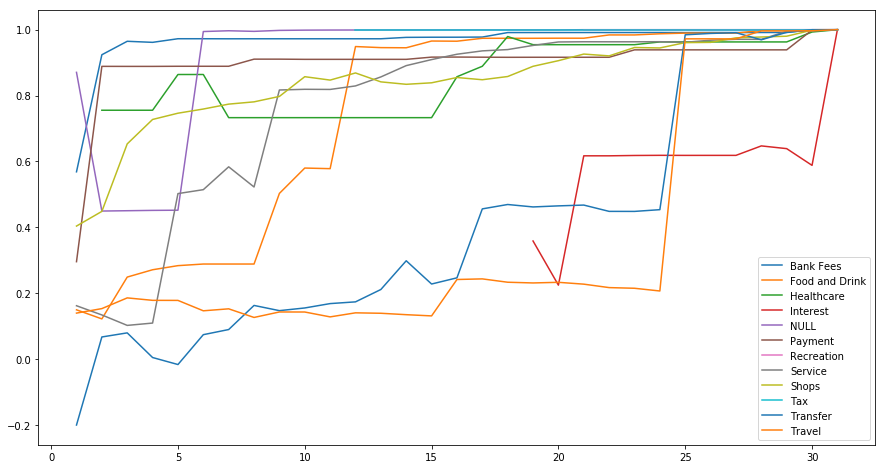

In [21]:
correlation_df.plot(figsize=(15,8))

## Variation -- just predicting a bad month

With spearman correlation, we are just asking (really) whether this is going to be a
good month or a bad month, not really caring about how good or bad.

In other words: on the 14th of the month, if this is the worst spending we've seen,
how likely is it that the whole month is going to be the worst we've ever seen?

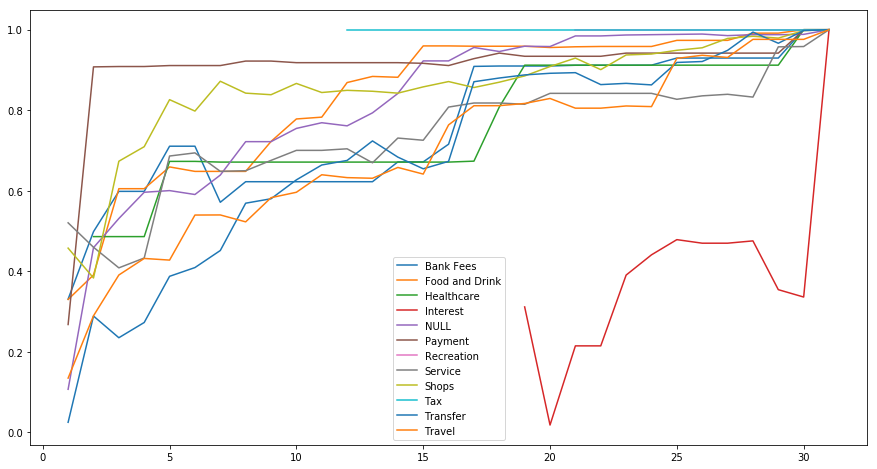

In [24]:
spearman_pre_df = {}
for category in data['category'].unique():
    if category in bad_categories:
        continue
    spearman_pre_df[category]= df[category].T.corr('spearman')[31]
spearman_df = pandas.DataFrame(spearman_pre_df)
spearman_df.plot(figsize=(15,8))

# Weighting the importance

Is there some relationship between the number of transactions, and how well we can predict overall
monthly spend in that category?

In the diagram below, think lines have more transactions.

There isn't a good relationship. Food and drink has huge numbers of transactions, but isn't all
that much easier to predict than Shopping.

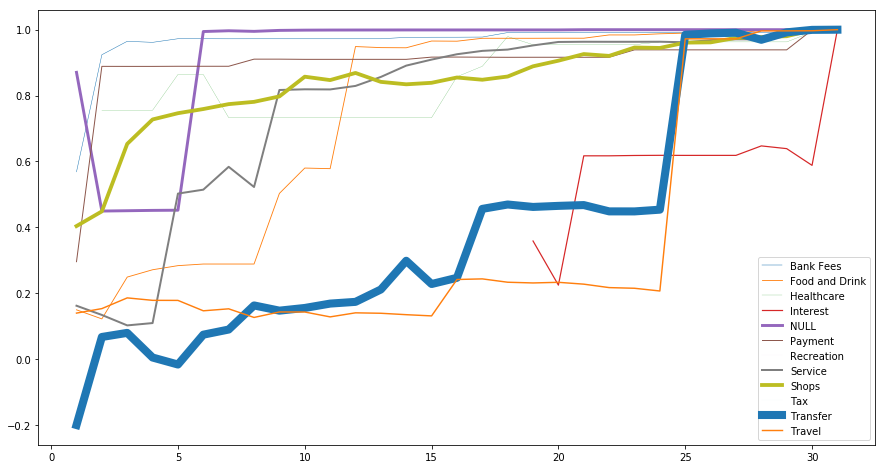

In [34]:
(fig, ax) = plt.subplots(figsize=(15,8))
for column in correlation_df.columns:
    ax.plot(correlation_df[column],
            linewidth=data[data['category'] == column].shape[0]/70.0,
            label=column
           )
ax.legend()

## Large dollar-value categories?

What about if we ask is it easier to predict high dollar value categories?

Answer: no, it's about as easy to predict a high value category as a low-value one.

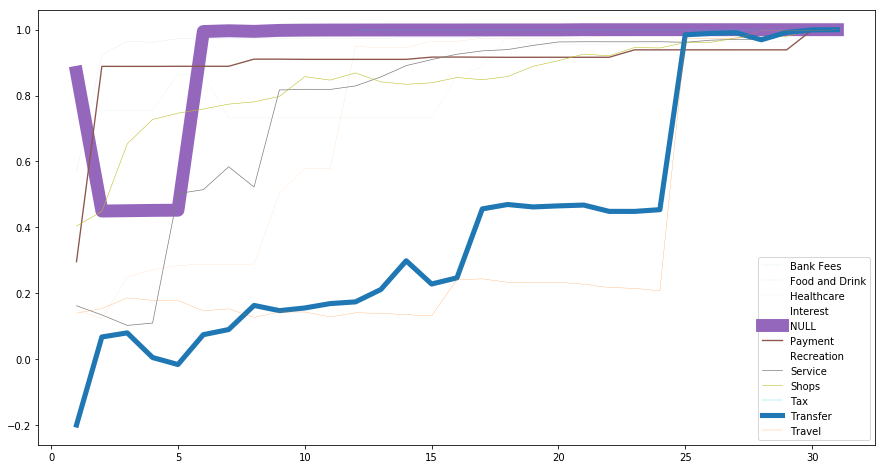

In [41]:
(fig, ax) = plt.subplots(figsize=(15,8))
for column in correlation_df.columns:
    if column in ['Income', 'Transfers', 'Rent', 'Mortgage']:
        continue
    ax.plot(correlation_df[column],
            linewidth=data[data['category'] == column].amount.sum() / 20000,
            label=column
           )
ax.legend()

# What spending categories are good predictors early of final monthly spend?

Which categories are the most important for us to predict? Which categories will tell us that the user
is going to make decent savings this month or not?

In [43]:
total_spend_by_month = data[data['category'].isin(bad_categories) == False
                                   ].groupby('year_month').amount.sum()
total_spend_by_month

year_month
2016-02       131.53
2016-03       311.85
2016-04       211.96
2016-05       342.21
2016-06       312.34
2016-07       333.49
2016-08      -813.76
2016-09      4128.81
2016-10      7696.78
2016-11     24731.73
2016-12     -6666.87
2017-01     -3470.25
2017-02     -7356.12
2017-03     -5381.48
2017-04       744.88
2017-05     -3581.20
2017-06     -4507.19
2017-07      -875.30
2017-08      -839.81
2017-09     -3505.96
2017-10      3001.56
2017-11      -223.27
2017-12      2216.57
2018-01     -7197.55
2018-02   -208200.44
Name: amount, dtype: float64

Food and drink is important. Too bad it's hard to predict.

Bank Fees  Food and Drink  Healthcare  Interest      NULL   Payment  \
1    0.023909        0.045196         NaN       NaN  0.868562  0.056544   
2    0.041359        0.054772    0.037100       NaN  0.484306  0.098869   
3    0.043032        0.063333    0.037100       NaN  0.482859  0.098704   
4    0.042839        0.066934    0.037100       NaN  0.482660  0.098704   
5    0.042779        0.066323    0.053469       NaN  0.483521  0.093684   
6    0.042779        0.072463    0.053469       NaN  0.988730  0.093684   
7    0.042566        0.072463    0.050046       NaN  0.988813  0.093684   
8    0.042522        0.072463    0.050046       NaN  0.964076  0.089156   
9    0.042522        0.073391    0.050046       NaN  0.973857  0.089156   
10   0.042522        0.100068    0.050046       NaN  0.977881  0.088049   
11   0.042522        0.106579    0.050046       NaN  0.980303  0.088049   
12   0.042522        0.108642    0.050046       NaN  0.981617  0.088049   
13   0.042522        0.105221    0.050046       NaN  0.982977  0.088049   
14   0.050515        0.107863    0.050046       NaN  0.983534  0.088049   
15   0.049255        0.117809    0.050046       NaN  0.983949  0.082500   
16   0.054555        0.118047    0.053443       NaN  0.983802  0.088052   
17   0.057656        0.129139    0.052645       NaN  0.984190  0.087722   
18   0.055719        0.129139    0.069262       NaN  0.983624  0.086901   
19   0.055841        0.129139    0.071756  0.037229  0.983666  0.085982   
20   0.055841        0.134758    0.071756  0.043708  0.983691  0.085982   
21   0.055801        0.134926    0.071756  0.110824  0.981629  0.085982   
22   0.055801        0.131949    0.071756  0.110824  0.981641  0.085982   
23   0.055801        0.131949    0.071756  0.110738  0.981637  0.085188   
24   0.055580        0.127075    0.080811  0.110681  0.981749  0.085188   
25   0.057007        0.131881    0.080811  0.110143  0.980783  0.085188   
26   0.056303        0.131881    0.080811  0.110476  0.980783  0.085188   
27   0.058165        0.131881    0.080811  0.110476  0.980794  0.085188   
28   0.057108        0.143957    0.080811  0.085619  0.980812  0.085072   
29   0.057108        0.143957    0.080811  0.082488  0.980811  0.085072   
30   0.058094        0.144463    0.080348  0.009182  0.980861  0.067418   
31   0.058094        0.143099    0.077063  0.065665  0.980941  0.067006   

    Recreation   Service     Shops       Tax  Transfer    Travel  
1          NaN  0.046346  0.037479       NaN  0.000674  0.976731  
2          NaN  0.126506  0.067774       NaN  0.465766  0.974740  
3          NaN  0.180860  0.297052       NaN  0.436458  0.930569  
4          NaN  0.203695  0.202338       NaN  0.489326  0.901875  
5          NaN  0.166301  0.641811       NaN  0.457790  0.894551  
6          NaN  0.162756  0.538618       NaN  0.967698  0.803985  
7          NaN  0.285764  0.451271       NaN  0.955850  0.897178  
8          NaN  0.270294  0.424618       NaN  0.951146  0.872423  
9          NaN  0.715086  0.488771       NaN  0.967627  0.860914  
10         NaN  0.696895  0.428893       NaN  0.958303  0.852542  
11         NaN  0.696578  0.392879       NaN  0.943753  0.772555  
12         NaN  0.725857  0.372900  0.044941  0.950160  0.847342  
13         NaN  0.803023  0.503871  0.044941  0.904227  0.825701  
14         NaN  0.757379  0.485364  0.044941  0.689888  0.823672  
15         NaN  0.774047  0.570956  0.044941  0.681300  0.816004  
16         NaN  0.758702  0.560503  0.044941  0.604755  0.840384  
17         NaN  0.774784  0.529380  0.044941  0.209682  0.760240  
18         NaN  0.790020  0.522802  0.044941  0.246979  0.750399  
19         NaN  0.813584  0.504731  0.044941  0.206590  0.746780  
20         NaN  0.838462  0.478642  0.044941  0.197426  0.729955  
21    0.052223  0.848544  0.414089  0.044941  0.250139  0.734068  
22    0.052223  0.847948  0.393108  0.044941  0.260842  0.720722  
23    0.052223  0.847948  0.349476  0.044941  0.261978  0.7187

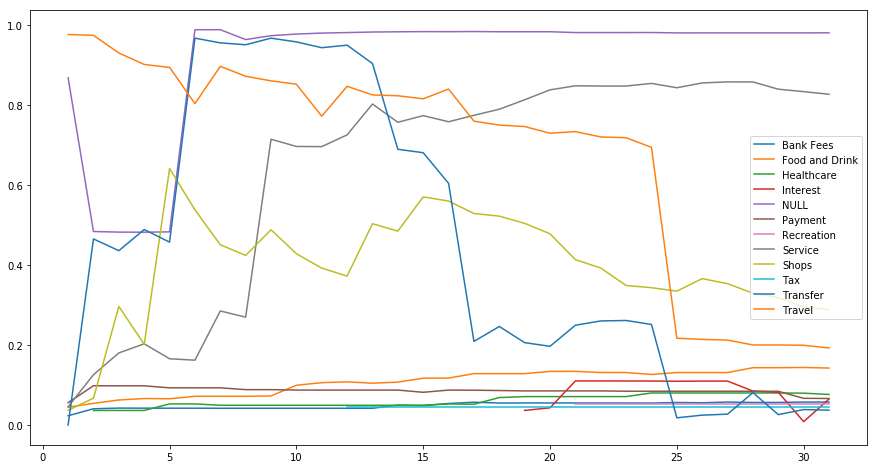

In [44]:
total_spend_corr_pre = {}
for column in correlation_df.columns:
    if column in bad_categories:
        continue
    category_spend = df[column].T.copy()
    category_spend['total_by_month']= total_spend_by_month
    total_spend_corr_pre[column] = category_spend.corr()['total_by_month'].abs()
total_spend_corr_df = pandas.DataFrame(total_spend_corr_pre)
total_spend_corr_df.drop('total_by_month', inplace=True)
total_spend_corr_df.plot(figsize=(15,8))
total_spend_corr_df

What if we just want to know whether it will be a bad or good month, without caring how good or bad?

Answer: hard to say, but grocery spending tells us almost nothing.

Bank Fees  Food and Drink  Healthcare  Interest      NULL   Payment  \
1    0.141535        0.322868         NaN       NaN  0.171751  0.071909   
2    0.125841        0.406501    0.056614       NaN  0.411101  0.224152   
3    0.038144        0.397735    0.056614       NaN  0.339680  0.191392   
4    0.038144        0.375156    0.056614       NaN  0.277840  0.191392   
5    0.039072        0.357813    0.102233       NaN  0.329210  0.215021   
6    0.039072        0.334100    0.102233       NaN  0.357366  0.215021   
7    0.013349        0.334100    0.102961       NaN  0.241012  0.215021   
8    0.090920        0.334100    0.102961       NaN  0.096877  0.218171   
9    0.090920        0.470068    0.102961       NaN  0.096877  0.218171   
10   0.090920        0.373853    0.102961       NaN  0.041444  0.203206   
11   0.090920        0.293459    0.102961       NaN  0.089144  0.203206   
12   0.090920        0.254357    0.102961       NaN  0.091763  0.203206   
13   0.090920        0.316357    0.102961       NaN  0.163024  0.203206   
14   0.160835        0.273305    0.102961       NaN  0.094097  0.203206   
15   0.160835        0.215041    0.102961       NaN  0.105714  0.190604   
16   0.259822        0.215041    0.102961       NaN  0.104939  0.194542   
17   0.302517        0.155611    0.101327       NaN  0.182386  0.221687   
18   0.305999        0.155611    0.053129       NaN  0.206394  0.206855   
19   0.305999        0.155611    0.044575  0.028307  0.219307  0.192080   
20   0.305999        0.118859    0.044575  0.099692  0.209268  0.192080   
21   0.315622        0.151642    0.044575  0.141431  0.145175  0.192080   
22   0.315622        0.143088    0.044575  0.141431  0.146719  0.192080   
23   0.315622        0.143088    0.044575  0.309183  0.136681  0.206855   
24   0.307721        0.143088    0.044575  0.394379  0.135908  0.206855   
25   0.266597        0.123914    0.044575  0.203052  0.144403  0.206855   
26   0.266597        0.123914    0.044575  0.259601  0.137453  0.206855   
27   0.266597        0.123914    0.044575  0.259601  0.138225  0.206855   
28   0.266597        0.085191    0.044575  0.278436  0.140542  0.206855   
29   0.266597        0.085191    0.044575  0.261080  0.140542  0.206855   
30   0.223899        0.133207    0.041274  0.160335  0.152897  0.314949   
31   0.223899        0.133207    0.041274  0.454615  0.177608  0.319615   

    Recreation   Service     Shops       Tax  Transfer    Travel  
1          NaN  0.440338  0.332390       NaN  0.335692  0.470679  
2          NaN  0.203536  0.202750       NaN  0.230499  0.423669  
3          NaN  0.211451  0.229123       NaN  0.316775  0.450570  
4          NaN  0.129166  0.183217       NaN  0.283370  0.316168  
5          NaN  0.416821  0.362050       NaN  0.202174  0.321300  
6          NaN  0.400474  0.360052       NaN  0.335390  0.225619  
7          NaN  0.336956  0.366707       NaN  0.224360  0.166338  
8          NaN  0.353223  0.384520       NaN  0.151655  0.023051  
9          NaN  0.378785  0.385294       NaN  0.088863  0.083488  
10         NaN  0.413643  0.386069       NaN  0.015003  0.098453  
11         NaN  0.413643  0.378324       NaN  0.011925  0.080337  
12         NaN  0.433783  0.385294  0.198148  0.033474  0.046470  
13         NaN  0.465064  0.397686  0.198148  0.108119  0.026779  
14         NaN  0.329533  0.386843  0.198148  0.059288  0.130197  
15         NaN  0.351218  0.454996  0.198148  0.003079  0.105174  
16         NaN  0.370580  0.476681  0.198148  0.052348  0.128312  
17         NaN  0.335729  0.482102  0.198148  0.222735  0.224741  
18         NaN  0.335729  0.468162  0.198148  0.211964  0.208330  
19         NaN  0.323555  0.446477  0.198148  0.231968  0.245504  
20         NaN  0.325099  0.451898  0.198148  0.246923  0.212977  
21    0.226455  0.325099  0.396911  0.198148  0.256154  0.283453  
22    0.226455  0.325099  0.345949  0.198148  0.246586  0.298942  
23    0.226455  0.325099  0.406181  0.198148  0.257692  0.2981

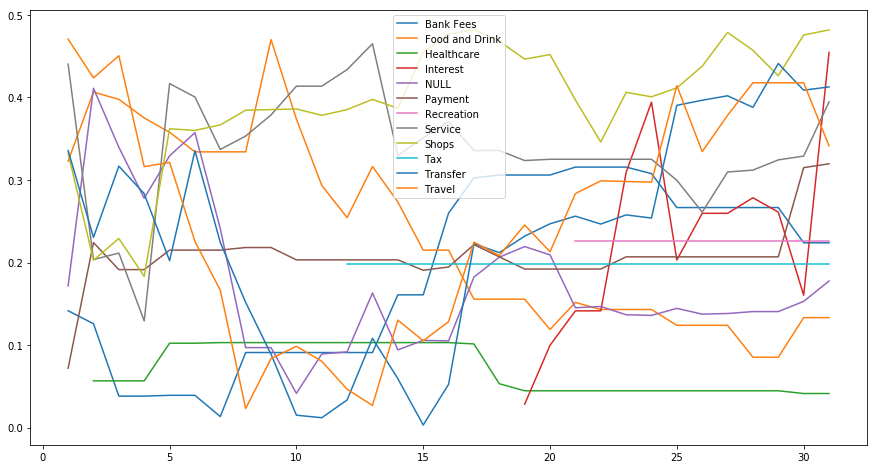

In [45]:
total_spend_corr_pre = {}
for column in correlation_df.columns:
    if column in bad_categories:
        continue
    category_spend = df[column].T.copy()
    category_spend['total_by_month']= total_spend_by_month
    total_spend_corr_pre[column] = category_spend.corr('spearman')['total_by_month'].abs()
total_spend_corr_df = pandas.DataFrame(total_spend_corr_pre)
total_spend_corr_df.drop('total_by_month', inplace=True)
total_spend_corr_df.plot(figsize=(15,8))
total_spend_corr_df